## **1. Selection of data.**

Importing modules, defending some functions, reading the data.

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess data
df = pd.read_csv("/content/sample_data/car.data", names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

print(df)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


***Comments on reading. Short explanations about the need to transform and supplement data in certain columns:***

>

The resulting data is in tabular DataFrame  format with seven columns: '***buying***', '***maint***', '***doors***', '***persons***', '***lug_boot***', '***safety***' and '***class***'. Each row corresponds to a specific car.
To prepare data for modeling, we can use the **Label Encoding** technique to replace categorical values with numeric ones.

## **2. Transformation of data**

In [ ]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

# Split into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


***Comments on the conversion. Explanation of the need for standardization and normalization of data:***


The resulting data were subjected to the **Label Encoding** process, where the categorical values of each attribute were replaced by their corresponding numerical equivalents. For example, '***buying***' has four possible categories (***v-high, high, med, low***), which are now represented by numerical values between 0 and 3. This transformation makes the data suitable for use in machine learning algorithms that require numerical input.

Regarding standardization and normalization for the simple multilayer perceptron (**MLP**):
In the case of a simple **MLP**, standardization or normalization of the data may be important because the algorithm is sensitive to the values of the input attributes and their scales.
Standardization can improve the speed of convergence of the algorithm and avoid the disproportionate impact of large values of individual attributes.

In [ ]:
# Standardization of data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled, X_test_scaled)

# Normalization of data
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train_scaled)
X_test_normalized = min_max_scaler.transform(X_test_scaled)

print(X_train_normalized, X_test_normalized)

# Convert to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_normalized, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.int64)
X_test_tensor = tf.convert_to_tensor(X_test_normalized, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.int64)

[[ 1.35185249  1.34948141  1.34190571  1.22503522 -1.22474807 -1.23299669]
 [ 0.4506175   1.34948141 -0.44385615 -0.00803009  1.22120833  1.22765519]
 [-0.4506175  -0.43433811  1.34190571 -1.24109541 -1.22474807 -1.23299669]
 ...
 [-1.35185249 -0.43433811  1.34190571  1.22503522 -0.00176987 -1.23299669]
 [-0.4506175  -1.32624787  0.44902478 -1.24109541  1.22120833  1.22765519]
 [ 0.4506175   0.45757165 -0.44385615  1.22503522  1.22120833  1.22765519]] [[-1.35185249 -1.32624787  0.44902478 -1.24109541 -0.00176987 -1.23299669]
 [ 0.4506175  -0.43433811 -1.33673708 -0.00803009 -0.00176987  1.22765519]
 [-1.35185249 -1.32624787  1.34190571 -1.24109541 -1.22474807  1.22765519]
 ...
 [ 0.4506175  -0.43433811 -1.33673708  1.22503522  1.22120833 -0.00267075]
 [ 1.35185249  1.34948141  1.34190571  1.22503522  1.22120833 -1.23299669]
 [ 0.4506175   0.45757165 -1.33673708 -1.24109541 -0.00176987  1.22765519]]
[[1.         1.         1.         1.         0.         0.        ]
 [0.66666667 1.    

**Standardization:**

'***buying***', '***maint***', '***doors***', '***persons***', '***lug_boot***', '***safety***': After **Label Encoding** we have numerical values, but their scale can vary greatly.
Standardization allows to rescale attributes so that their values have a mean of 0 and a standard deviation of 1.
Formula: Standardized_Value = (X - Mean(X)) / StdDev(X), where X is the original value of the attribute, Mean(X) is the average value of the attribute, StdDev(X) is the standard deviation of the attribute.

**Normalization (optional):**

Normalization can also be used to bring values between 0 and 1.
Formula: Normalized_Value = (X - Min(X)) / (Max(X) - Min(X)), where X is the original value of the attribute, Min(X) is the minimum value of the attribute, and Max(X) is the maximum value of the attribute.

## **3. Simple MLP learning**

***Theoretical description of the perceptron:***

CarClassifier is a simple neural network model for the task of car classification. It consists of an input layer, a hidden layer with **ReLU** activation, and an output layer with **softmax** activation. The model is designed to process the input features of the car, such as purchase price, maintenance cost, number of doors, etc. The hidden layer introduces nonlinearity using the Rectified Linear Unit (**ReLU**) activation function and at the output we get the probabilities of belonging to one of the classes using the **softmax** function, which is usually used for multiclass classification. The output layer generates a set of scores for each class and the class with the highest score is assumed as the final output. The model is trained using the **Adam optimizer** and the cross-entropy loss function for 300 epochs, achieving accuracy on the test set of 97.11% on the car classification dataset.

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(set(y))  # Number of classes
num_epochs = 300

# Define a simple neural network model
model = keras.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size)),
    layers.Dense(output_size, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Convert y_train to numpy array if it's not already
y_train_array = y_train_tensor.numpy() if isinstance(y_train_tensor, tf.Tensor) else y_train_tensor

# Training loop
model.fit(X_train_tensor, y_train_array, epochs=num_epochs, verbose=1)

# Evaluate the model on the test set
predictions = model.predict(X_test_tensor)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test_tensor.numpy(), predicted_labels.numpy())
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/300
44/44 [==============================] - 2s 2ms/step - loss: 1.0918 - accuracy: 0.5897
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.7055
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.7055
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.7135
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.7142
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.7156
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.7207
Epoch 8/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.7192
Epoch 9/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7236
Epoch 10/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7308
Epoch 11/

***Comments on the results of learning a perceptrone. Model quality analysis:***

This code uses a simple neural network to classify cars based on given characteristics. The model has one hidden layer with **ReLU** activation and an output layer with a **softmax** activation function to obtain probabilities for different classes. The categorical loss of the **cross-entropy** function is used to train the model, the optimizer is **Adam**. The training duration is limited to 1000 epochs. After training, the model is evaluated on the test set, and the classification accuracy is derived.

Confusion Matrix:
[[ 79   1   3   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
ROC-AUC: 0.9987


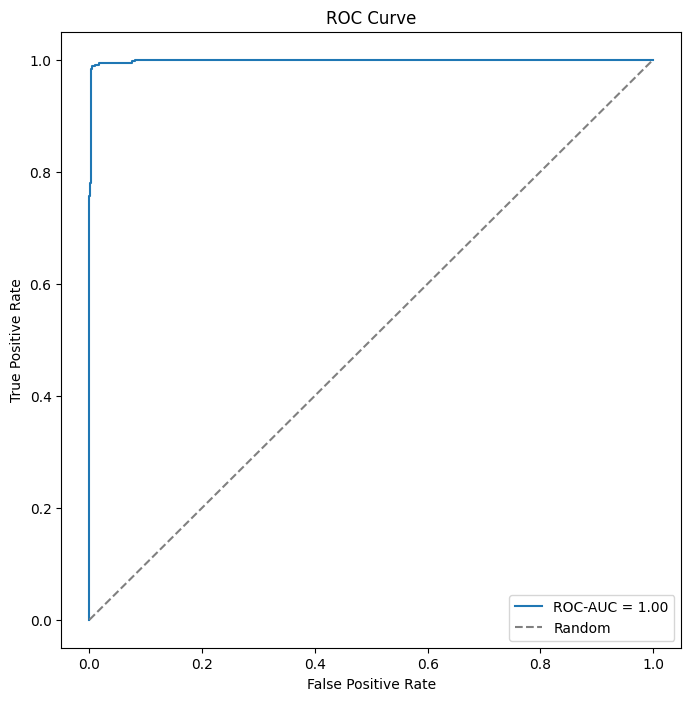

In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Compute and display ROC-AUC score
y_test_one_hot = tf.keras.utils.to_categorical(y_test_tensor, num_classes=output_size)
roc_auc = roc_auc_score(y_test_one_hot, predictions)
print(f'ROC-AUC: {roc_auc:.4f}')

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_one_hot.ravel(), predictions.ravel())
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **5. Construction of classification trees**

***Discussion of possible options for selecting the target attribute. Formulas for calculating entropy and information gain for processed data. Classification tree model***

The provided dataset has a target attribute of '***class***' which represents the eligibility of the vehicle. It is a natural choice for classification tasks where the task is to predict the acceptability category of a vehicle based on its characteristics.

**Entropy (H):**

Formula: entropy (H) = - sum (p_i * log2(p_i)) for each class i.
Here p_i represents a selection of instances in class i.

**Information Gain (IG):**

Information gain measures the effectiveness of an attribute in reducing uncertainty.
Formula: information gain (IG) = entropy (S) – sum [(|S_v| / |S|) * entropy (S_v)] for each value in attribute A.
Here S is a set of instances, A is an attribute, and S_v is a subset of instances for a given value of v.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Load and preprocess data
df = pd.read_csv("/content/sample_data/car.data", names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Testing the Decision Tree model
predictions = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.40%


***Model quality analysis and comments:***

The model demonstrates satisfactory performance on the test set with an accuracy of 97.40%. Further investigation of accuracy, recall, and feature importance may provide additional insight into its strengths and potential areas for improvement.

## **6. General conclusions about the models:**

**MLP:**

Confusion Matrix:
The model successfully classifies the classes '***unacc***' and '***good***' (with an accuracy of 76 and 14, respectively).
Some shortcomings in the classification of the class '***acc***' (11 correctly classified out of 11) and '***vgood***' (14 correctly classified out of 17).

***ROC-AUC:***

The ROC-AUC value of 0.9984 indicates the high overall performance of the model in class discrimination.

***Conclusion:*** The model exhibits high accuracy and efficiency in classifying cars according to specified characteristics.

**Decision Tree:**

The model based on the decision tree classifier shows commendable performance on the test set, achieving an accuracy of 97.40%. It effectively predicts vehicle acceptability by demonstrating its suitability for the task. Building a decision tree captures underlying patterns in the data set, providing a transparent model that can be interpreted. Potential ways for improvement could include tuning hyperparameters and exploring alternative tree-based models. Overall, the model demonstrates robustness and is a valuable tool for classifying vehicle acceptability.